In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

import pylab
import csv
import math
import re
import time
import random
import os


from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import cross_validation
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


%matplotlib inline

In [2]:
def Load_data_file(filename): 
    #the data are load in the system
    with open(filename,'r') as fi:
        df = pd.read_csv(fi)
        return df


In [3]:
df = Load_data_file('/Users/Dramane/Desktop/Senior_project2/Train2.csv')

In [4]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,5/13/15 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/15 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/15 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/15 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/15 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:

def Generate_Var(df) : 
    #the data our system received have different keys used as variables to make the prediction. 
    #Knowing that not all the variable are not applicable for all the stores, the system generates 
    #just the applicable variables.
    
    return list(df.columns)

def Pick_Var(variable): 
    #the user pick the variables he want to use for the prediction.
    
    global y_feature
    global y_feature_index
    y_feature = variable
    
    for i in range(len(df.columns)):
        if df.columns[i]== y_feature:
            y_feature_index = i
    return variable


In [5]:
Generate_Var(df)

['Dates',
 'Category',
 'Descript',
 'DayOfWeek',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y']

In [6]:
Pick_Var('Category')

'Category'

In [7]:
y_feature

'Category'

In [8]:
def x_features():
    global x_features
    x_features = []
    for feat in list(df.columns):
        if feat!= y_feature:
            x_features.append(feat)
    return x_features
       

In [9]:
x_features()

['Dates',
 'Descript',
 'DayOfWeek',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y']

In [10]:

def Clean_Data(df): 
    #the  system remove redundancy, normalize, and preprocess the data
    
    # Convert Categorical values into numerical values
    for i in range (len(df.columns)):
        if df[df.columns[i]].dtypes == 'object':
            df[df.columns[i]] = df[df.columns[i]].astype('category').cat.codes
    
    # Fill in missing values
    for i in range (len(df.columns)):
        if df[df.columns[i]].isnull().any().any():
            df[df.columns[i]].fillna(df[df.columns[i]].mean(), inplace=True)
            
            


In [11]:
Clean_Data(df)

In [13]:
def Explore_Data(data):   
    Clean_Data(data)
    for i in range(len(Generate_Var(data))):
        plt.title(data.columns[i])
        plt.hist((data[data.columns[i]]), bins=50)
        plt.show()

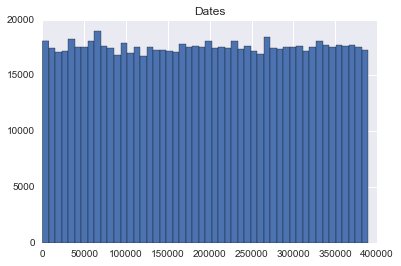

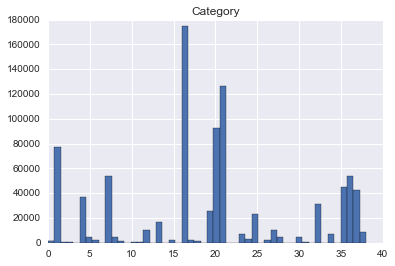

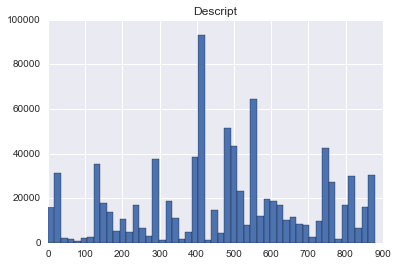

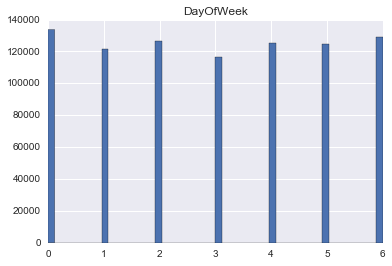

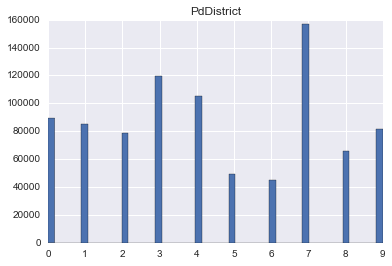

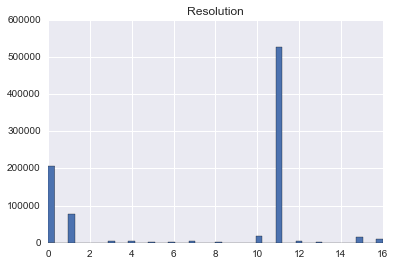

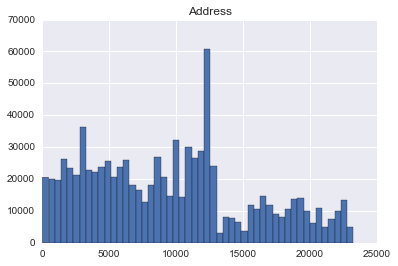

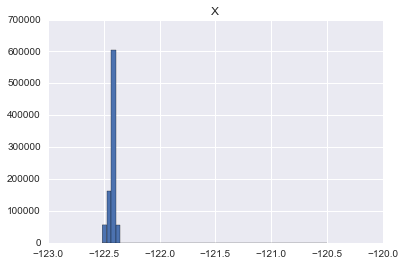

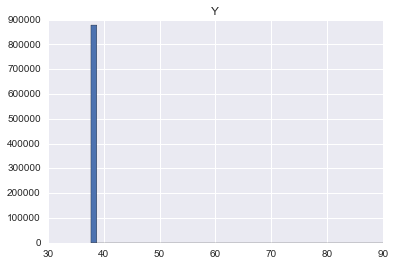

In [14]:
Explore_Data(df)

In [31]:
def Generate_Method(): 
    #different methods are generated based on data(linear regression, 
    #clustering, classification, etc..)
    methods = ['LinearRegression  ', 'DecisionTree  ', 'RandomForest  ', 'XGBoost  ', 'Neural_Network']
    print('     -- Pick an Algorithm to fit your model--')
    print('')
    print('\n'.join(methods))



In [32]:
Generate_Method()

     -- Pick an Algorithm to fit your model--

LinearRegression  
DecisionTree  
RandomForest  
XGBoost  
Neural_Network


In [5]:
def Generate_Prediction(model): 
    #the system generate the prediction result
    
    model= model.lower()
    if model== 'xgboost':
        return xgboost_model()
    
    elif model== 'randomforest':
        model = RandomForestClassifier(n_estimators=100)
        predictor_var = x_features()
        output_var = y_features()
        return classification_model(model, df, predictor_var, output_var)
    
    elif model== 'decisiontree':
        model = DecisionTreeClassifier()
        predictor_var = x_features()
        output_var = y_features()
        return classification_model(model, df, predictor_var, output_var)
    
    elif model== 'linearregression':
        model = LogisticRegression()
        predictor_var = 'Category'  #x_features()[1]
        output_var = y_features()
        return classification_model(model, df, predictor_var, output_var)
    
    elif model== Neural_Network:
        return Neural_Network_model()

In [7]:
def classification_model(model, df, predictor_var, output_var):
    #Generic function for making a classification model and accessing performance:
          
    #Fit the model:
    model.fit(df[predictor_var],df[output_var])
  
    #Make predictions on training set:
    predictions = model.predict(df[predictor_var])
    
    #predictions.to_csv('prediction_result.csv')
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,df[output_var])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        df, df[output_var], test_size=0.2, random_state=0)


    #Perform k-fold cross-validation with 5 folds
    kf = KFold(df.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictor_var = (df[predictor_var].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = df[output_var].iloc[train]
    
        # Training the algorithm using the predictor_var and target.
        model.fit(train_predictor_var, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(df[predictor_var].iloc[test,:], df[output_var].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(df[predictor_var],df[output_var]) 
    
    

In [8]:

def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

def rmspe_xg(yhat, y):
    # y = y.values
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

def xgboost_model(): 
    #the system generate the prediction result
    
    #our system splits the data, and almost  one third are submit to the system as training data. 
    X_train, X_test, y_train, y_test = train_test_split(df[x_features()], df[y_features()],
                                                    test_size=0.2, random_state=30)
    
    data = np.random.rand(5,10) # 5 entities, each contains 10 features
    label = np.random.randint(2, size=5) # binary target
    dtrain = xgb.DMatrix( data, label=label)
    
    
    dtrain = xgb.DMatrix(X_train, y_train)
    dtest = xgb.DMatrix(X_test, y_test)
    
    num_round = 500
    evallist = [(dtrain, 'train'), (dtest, 'test')]
    
    param = {'bst:max_depth':12,
         'bst:eta':0.0095,
         'subsample':0.8,
         'colsample_bytree':0.7,
         'silent':1, 
         'objective':'reg:linear',
         'nthread':6,
         'seed':42}

    plst = param.items()

    bst1 = xgb.train(plst, dtrain, num_round, evallist, feval=rmspe_xg, verbose_eval=50, early_stopping_rounds=100)



In [29]:
Generate_Prediction('DecisionTree')

Accuracy : 99.998%
Cross-Validation Score : 98.979%


In [33]:
Generate_Prediction('xgboost')

Will train until test error hasn't decreased in 100 rounds.
[0]	train-rmspe:0.970813	test-rmspe:0.970728
[50]	train-rmspe:13.178564	test-rmspe:14.189058
[100]	train-rmspe:455.769342	test-rmspe:514.359474
Stopping. Best iteration:
[5]	train-rmspe:0.969290	test-rmspe:0.969203



In [31]:
Generate_Prediction('RandomForest')

Accuracy : 99.998%
Cross-Validation Score : 91.846%


In [ ]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh



In [ ]:
for i in df['Store'].unique():
    df.loc[(df['Set'] == 1) & (df['Store'] == i) & (df['Open'] == 1), 'Outlier'] = \
        mad_based_outlier(df.loc[(df['Set'] == 1) & (df['Store'] == i) & (df['Open'] == 1)]['Sales'], 3)